## Colorado Motor Vehicle Sales Data
#### Description
#### This dataset contains information on motor vehicle sales in various counties across Colorado, segmented by year and quarter. The data is useful for analyzing trends in vehicle sales, understanding the economic impact of automotive transactions, and making informed decisions in related business or policy planning.

### Columns
### Year: The calendar year in which the sales data was recorded.
### Quarter: The quarter of the year during which the sales were made. The quarters are divided as follows:
#### Q1: January to March
#### Q2: April to June
#### Q3: July to September
#### Q4: October to December
#### County: The name of the county in Colorado where the sales were recorded.
#### Sales: The total dollar amount of motor vehicle sales in the specified county and quarter.
### Use Cases
### Economic Analysis: Track the economic health and trends in the automotive market within Colorado.
### Market Research: Identify sales patterns and market demands in different counties.
### Policy Making: Inform decisions on automotive industry regulations and infrastructure planning.
#### File Format
#### The dataset is available in CSV format, making it easy to import into various data analysis tools and software. The CSV file might be named colorado_motor_vehicle_sales.csv.

Column names in the dataset:
Index(['year', 'quarter', 'county', 'sales'], dtype='object')

First few rows of the dataset:
   year  quarter              county      sales
0  2008        1               Adams  231609000
1  2008        1            Arapahoe  550378000
2  2008        1  Boulder/Broomfield  176771000
3  2008        1              Denver  200103000
4  2008        1             Douglas   93259000

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None

Summary statistics of the sales column:
count    5.010000e+02
mean     1.760585e+08
std      1.642055e+08
min      6.274000e+06
25%      6.148200e+07
50%      1.385820e

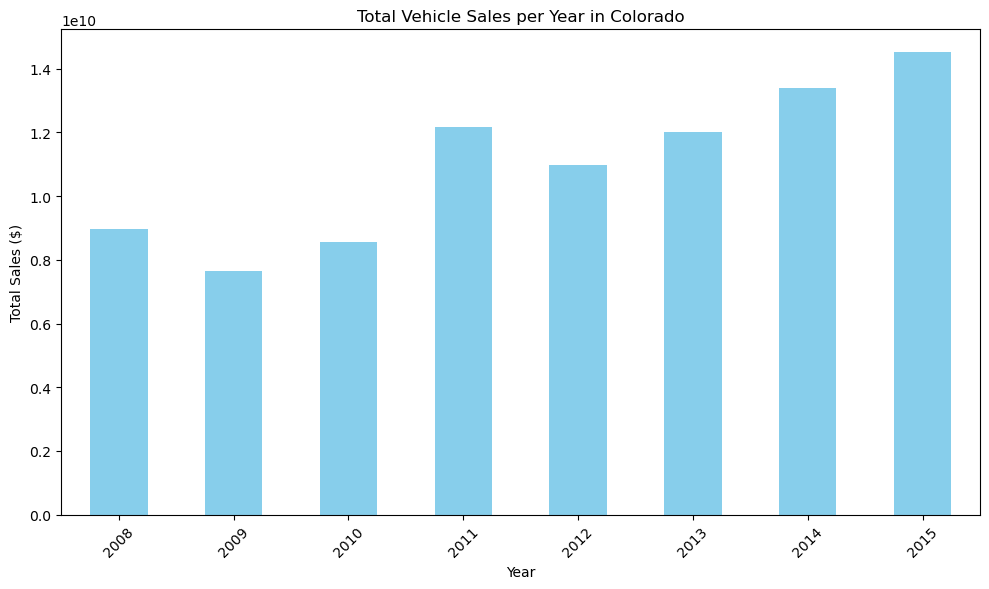

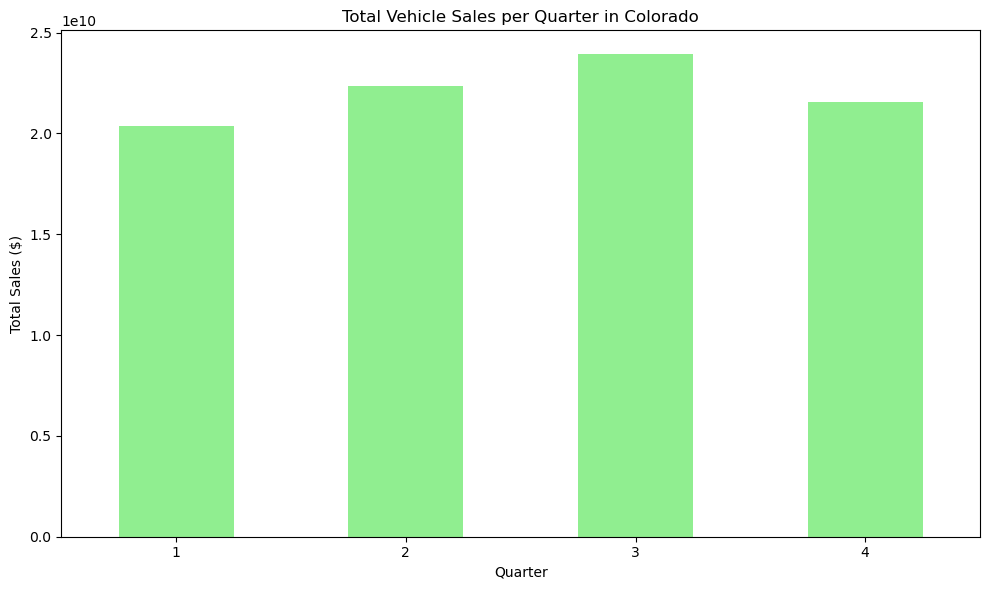

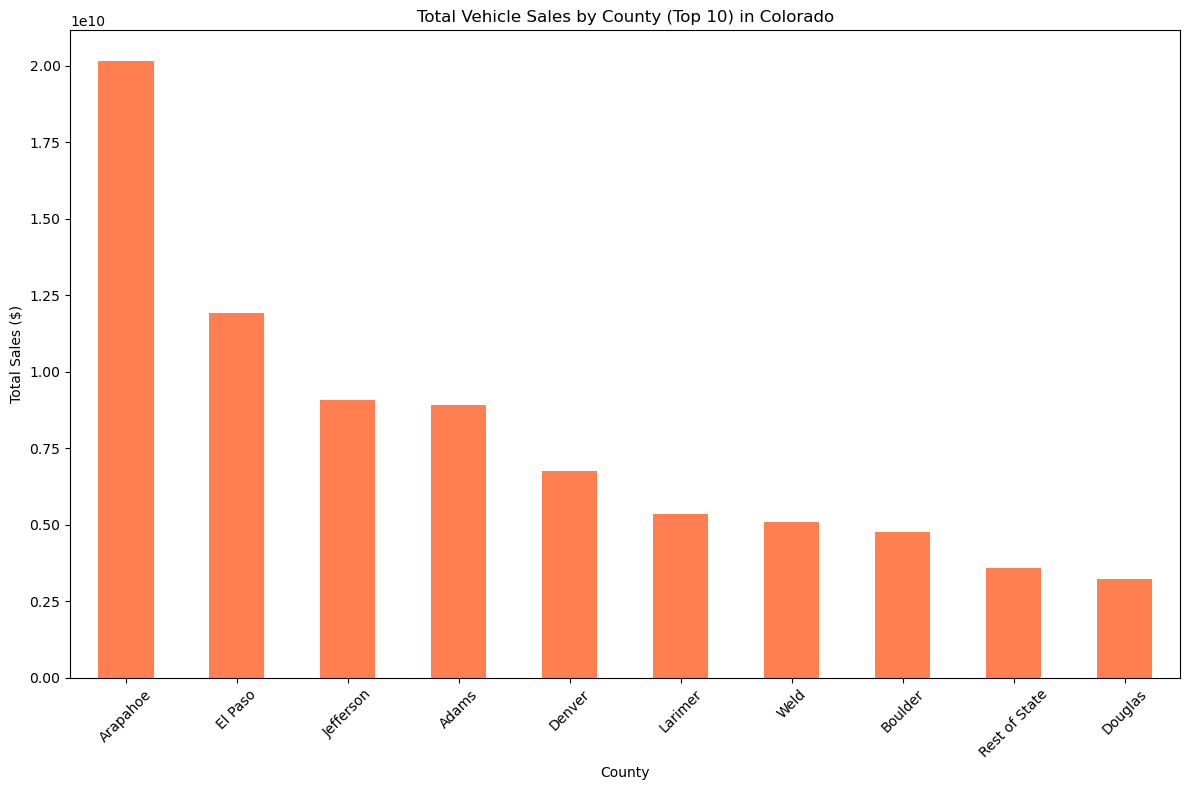

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'colorado_motor_vehicle_sales.csv'
data = pd.read_csv(file_path)

# Display the column names to diagnose the issue
print("Column names in the dataset:")
print(data.columns)

# Strip any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Correct column names to match the dataset
year_col = 'year'
quarter_col = 'quarter'
county_col = 'county'
sales_col = 'sales'

# Check if 'sales' column exists and print a message if not
if sales_col not in data.columns:
    print(f"Error: '{sales_col}' column not found in the dataset.")
else:
    # Display the first few rows of the dataset
    print("\nFirst few rows of the dataset:")
    print(data.head())

    # Display basic information about the dataset
    print("\nBasic information about the dataset:")
    print(data.info())

    # Summary statistics of the sales column
    print("\nSummary statistics of the sales column:")
    print(data[sales_col].describe())

    # Total sales per year
    print("\nTotal sales per year:")
    total_sales_per_year = data.groupby(year_col)[sales_col].sum()
    print(total_sales_per_year)

    # Total sales per quarter
    print("\nTotal sales per quarter:")
    total_sales_per_quarter = data.groupby(quarter_col)[sales_col].sum()
    print(total_sales_per_quarter)

    # Total sales per county
    print("\nTotal sales per county:")
    total_sales_per_county = data.groupby(county_col)[sales_col].sum()
    print(total_sales_per_county)

    # Plotting sales trends over years and quarters

    # Sales trends over years
    plt.figure(figsize=(10, 6))
    total_sales_per_year.plot(kind='bar', color='skyblue')
    plt.title('Total Vehicle Sales per Year in Colorado')
    plt.xlabel('Year')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Sales trends over quarters
    plt.figure(figsize=(10, 6))
    total_sales_per_quarter.plot(kind='bar', color='lightgreen')
    plt.title('Total Vehicle Sales per Quarter in Colorado')
    plt.xlabel('Quarter')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Sales trends by county (top 10 counties)
    top_10_counties = total_sales_per_county.sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    top_10_counties.plot(kind='bar', color='coral')
    plt.title('Total Vehicle Sales by County (Top 10) in Colorado')
    plt.xlabel('County')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()